# Simulate 2-dimensional examples of models 

Duncan Tulimieri

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16})
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import scipy.stats as stats
import savingfigures as sf

In [2]:
def plotSimAndRegions(x1, x2, x3, models, save_str):
    plt_styles, bgs, smallAlphas = ['seaborn-bright', 'dark_background'], ['_wbg', '_kbg'], [0.2, 0.5]
    for bg, style, smallAlpha in zip(bgs, plt_styles, smallAlphas):
        with plt.style.context(style):
            # set up 
            fig  = plt.figure(figsize=(8,6))
            p0 = plt.scatter(x1[:,0], x1[:,1])
            p1 = plt.scatter(x2[:,0], x2[:,1])
            p2 = plt.scatter(x3[:,0], x3[:,1])
            ax = plt.gca()
            # values to be "shaded"
            xlim, ylim = ax.get_xlim(), ax.get_ylim()
            x_array, y_array = np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100)
            x_grid, y_grid = np.meshgrid(x_array, y_array)
            x_grid_flat, y_grid_flat = np.matrix.flatten(x_grid), np.matrix.flatten(y_grid)
            # predictions
            preds = np.full((len(x_grid_flat), len(models)), np.nan)
            for idx, model in enumerate(models): 
                preds[:,idx] = model.predict(np.array([x_grid_flat, y_grid_flat]).T)
            predictions = np.squeeze(stats.mode(preds, 1)[0])
            # shade regions
            for p, group in zip([p0, p1, p2], range(1,4)):
                predictions_idx = predictions == group
                plt.scatter(x_grid_flat[predictions_idx], y_grid_flat[predictions_idx], s=7, alpha=smallAlpha, c=p.get_facecolor())
            plt.xticks([])
            plt.yticks([])
            plt.show()
            sf.auto_save(fig, save_str+bg)

## LDA

In [3]:
Sigma = np.array([[1, 3/5], [3/5, 2]])
n = 30
x1 = np.random.multivariate_normal([2, 2], Sigma, (n))
x2 = np.random.multivariate_normal((4, 2), Sigma, (n))
x3 = np.random.multivariate_normal((3, 3), Sigma, (n))
X = np.vstack((x1, x2, x3))
y = np.concatenate((np.ones(n), np.ones(n)*2, np.ones(n)*3))

In [4]:
# train LDA model 
LDA_model = LinearDiscriminantAnalysis().fit(X,y)

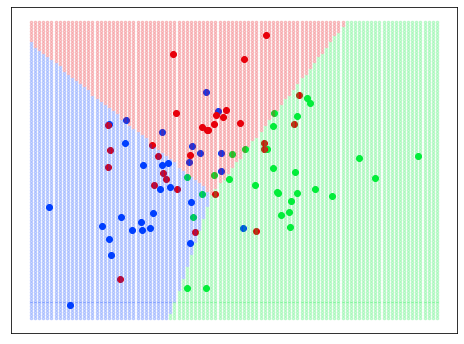

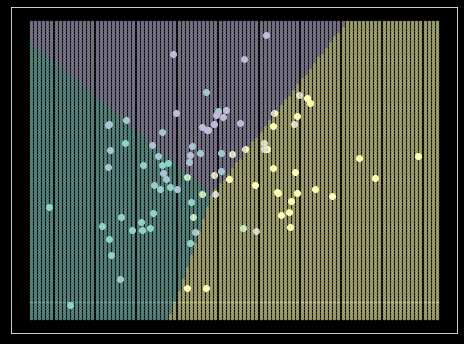

In [5]:
plotSimAndRegions(x1, x2, x3, [LDA_model], 'LDA_Example')

## QDA

In [6]:
Sigma1 = np.array([[0.7, 0.5], [0.5, 0.7]])
Sigma2 = np.array([[0.2, 2/5], [2/5, 1]])
Sigma3 = np.array([[1, 1/10], [1/10, 1]])
n = 300
x1 = np.random.multivariate_normal([2.5, 2], Sigma1, (n))
x2 = np.random.multivariate_normal((4, 2), Sigma2, (n))
x3 = np.random.multivariate_normal((2, 3), Sigma3, (n))
X = np.vstack((x1, x2, x3))
y = np.concatenate((np.ones(n), np.ones(n)*2, np.ones(n)*3))

In [7]:
# train QDA model 
QDA_model = QuadraticDiscriminantAnalysis().fit(X,y)

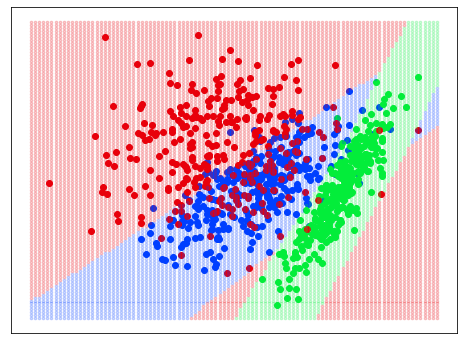

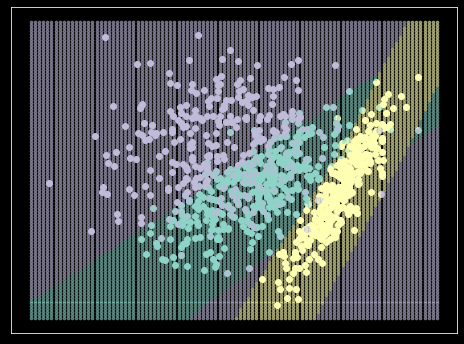

In [8]:
plotSimAndRegions(x1, x2, x3, [QDA_model], 'QDA_Example')

## Logistic Regression

In [9]:
Sigma = np.array([[1, 3/5], [3/5, 2]])
n = 30
x1 = np.random.multivariate_normal([2, 2], Sigma, (n))
x2 = np.random.multivariate_normal((4, 2), Sigma, (n))
x3 = np.random.multivariate_normal((3, 3), Sigma, (n))
X = np.vstack((x1, x2, x3))
y = np.concatenate((np.ones(n), np.ones(n)*2, np.ones(n)*3))

In [10]:
# train logistic regression model 
LR_model = LogisticRegression().fit(X,y)

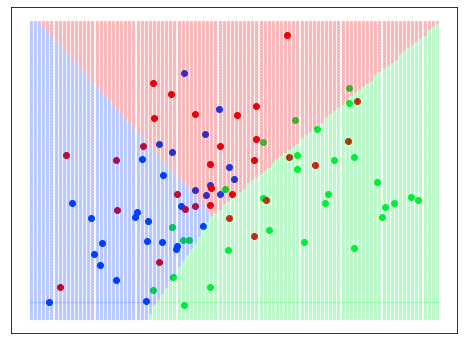

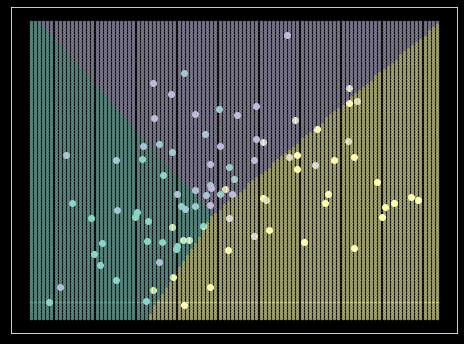

In [11]:
plotSimAndRegions(x1, x2, x3, [LR_model], 'LR_Example')

## KNN

In [12]:
Sigma = np.array([[1, 3/5], [3/5, 2]])
n = 30
x1 = np.random.multivariate_normal([2, 2], Sigma, (n))
x2 = np.random.multivariate_normal((4, 2), Sigma, (n))
x3 = np.random.multivariate_normal((3, 3), Sigma, (n))
X = np.vstack((x1, x2, x3))
y = np.concatenate((np.ones(n), np.ones(n)*2, np.ones(n)*3))

In [13]:
# train logistic regression model 
KNN_model = KNeighborsClassifier().fit(X,y)

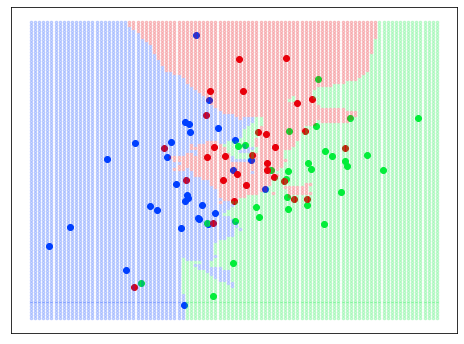

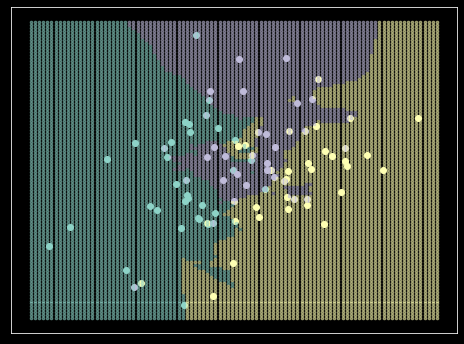

In [14]:
plotSimAndRegions(x1, x2, x3, [KNN_model], 'KNN_Example')

## SVM

In [15]:
Sigma = np.array([[1, 3/5], [3/5, 2]])
n = 30
x1 = np.random.multivariate_normal([2, 2], Sigma, (n))
x2 = np.random.multivariate_normal((4, 2), Sigma, (n))
x3 = np.random.multivariate_normal((3, 3), Sigma, (n))
X = np.vstack((x1, x2, x3))
y = np.concatenate((np.ones(n), np.ones(n)*2, np.ones(n)*3))

In [16]:
# train logistic regression model 
SVM_model = SVC().fit(X,y)

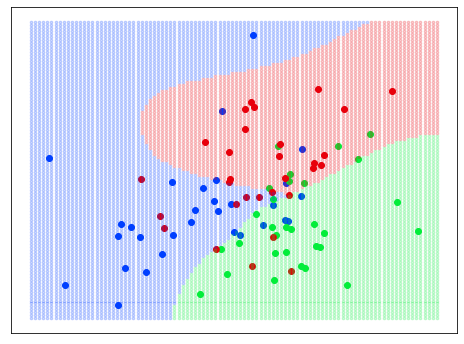

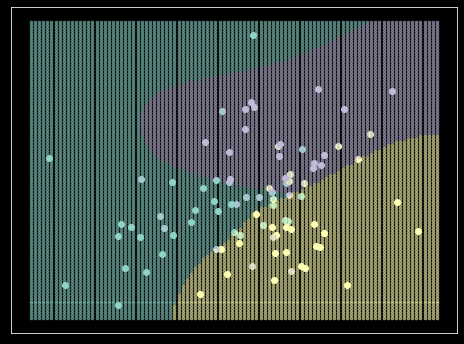

In [17]:
plotSimAndRegions(x1, x2, x3, [SVM_model], 'SVM_Example')

## Ensemble

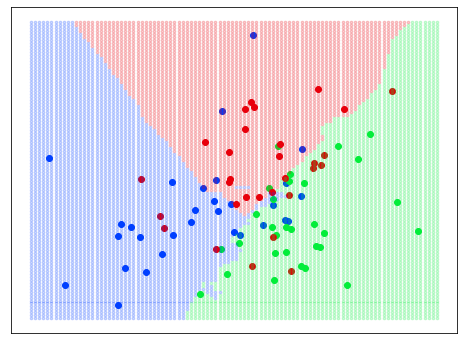

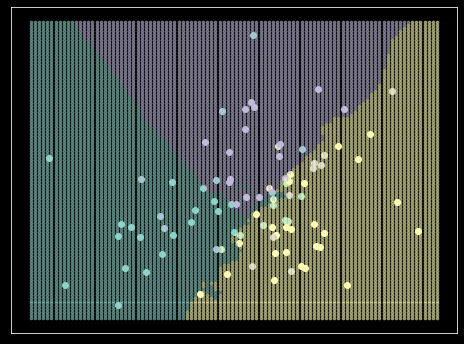

In [18]:
plotSimAndRegions(x1, x2, x3, [LDA_model, QDA_model, LR_model, KNN_model, SVM_model], 'Ensemble_Example')